In [4]:
from pathlib import Path
import pickle
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.cluster import DBSCAN
import simplekml
from smount_predictors import SeamountHelp, SeamountTransformer
import xarray as xr
import pygmt

In [5]:
points = (-19.20600998877477, -15.16349705205003, -117.7208544442338, -110.2604021311965)
dest = 'test_files'

In [6]:

vgg_train_zone = xr.open_dataset('data/vgg_swot.grd')
# vgg_train_zone['z'] = vgg_train_zone['z'].transpose()
fig = pygmt.Figure()
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", FONT_LABEL="15p,Helvetica,black", FONT_ANNOT="15p")
pygmt.config(FONT_ANNOT_PRIMARY="15p,Helvetica,black")

############################ SWIR ##################################
pygmt.makecpt(cmap="data/colors.cpt", series=[-1, 100, 0.2], background='o')
fig.grdimage(
    grid = xr.DataArray(vgg_train_zone.z, coords=(vgg_train_zone.lat, vgg_train_zone.lon)),
    # shading = shade_SWIR,
    projection="M90c",
    region = [points[2], points[3], points[0], points[1]],
    frame=["WSrt", "xa0.5", "ya0.5"],
    cmap = True,
)
fig.grdcontour(
    grid=xr.open_dataset('data/test_files/training_data_new.nc', engine='netcdf4')['Labels'],
    annotation="200+f12p", 
    interval=1,
    pen = "1p, black",
    limit=[-1, 2]
    )

fig.colorbar(position="JML+o-16c/0c+w4c/0.3c+m", frame=["xa4f1", "y+lEötvös"])
# old_vgg_file = xr.open_dataset("/Volumes/envisat2/SWOT/src/sandwell/grid_swot/curv_32.1.nc")
fig.show()

/var/folders/v7/nxggzv_j5s936v9rvl85gh2w0000gn/T/ipykernel_35818/3711906888.py:17: FutureWarning: The 'interval' parameter has been deprecated since v0.12.0 and will be removed in v0.16.0. Please use 'levels' instead.
  fig.grdcontour(


In [ ]:
srtm = xr.open_dataset('data/'+f'{dest}'+'/srtm_train_zone.nc')
srtm = xr.open_dataset('data/SRTM15_V2.5.nc')
fig = pygmt.Figure()
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", FONT_LABEL="15p,Helvetica,black", FONT_ANNOT="15p")
pygmt.config(FONT_ANNOT_PRIMARY="15p,Helvetica,black")

############################ SWIR ##################################
pygmt.makecpt(cmap="haxby", series=[-4000, -1500, 1], background='o')
fig.grdimage(
    grid = xr.DataArray(srtm.z, coords=(srtm.lat, srtm.lon)),
    # shading = shade_SWIR,
    projection="M90c",
    region = [points[2], points[3], points[0], points[1]],
    frame=["WSrt", "xa0.5", "ya0.5"],
    cmap = True,
    # shading = pygmt.grdgradient(xr.DataArray(srtm.z, coords=(srtm.lat, srtm.lon)), direction='a', normalize=True)
    )

fig.grdcontour(
    grid=xr.open_dataset('data/test_files/training_data_new.nc')['Labels'],
    annotation="200+f12p", 
    interval=1,
    pen = "1p, black",
    limit=[-3400, 2800]
    )
fig.colorbar(position="JML+o-16c/0c+w4c/0.3c+m", frame=["xa500f500", "y+lMeters"])
# old_vgg_file = xr.open_dataset("/Volumes/envisat2/SWOT/src/sandwell/grid_swot/curv_32.1.nc")
fig.show()

In [14]:
labeled_training_data = xr.open_dataset('data/training_data_new.nc')

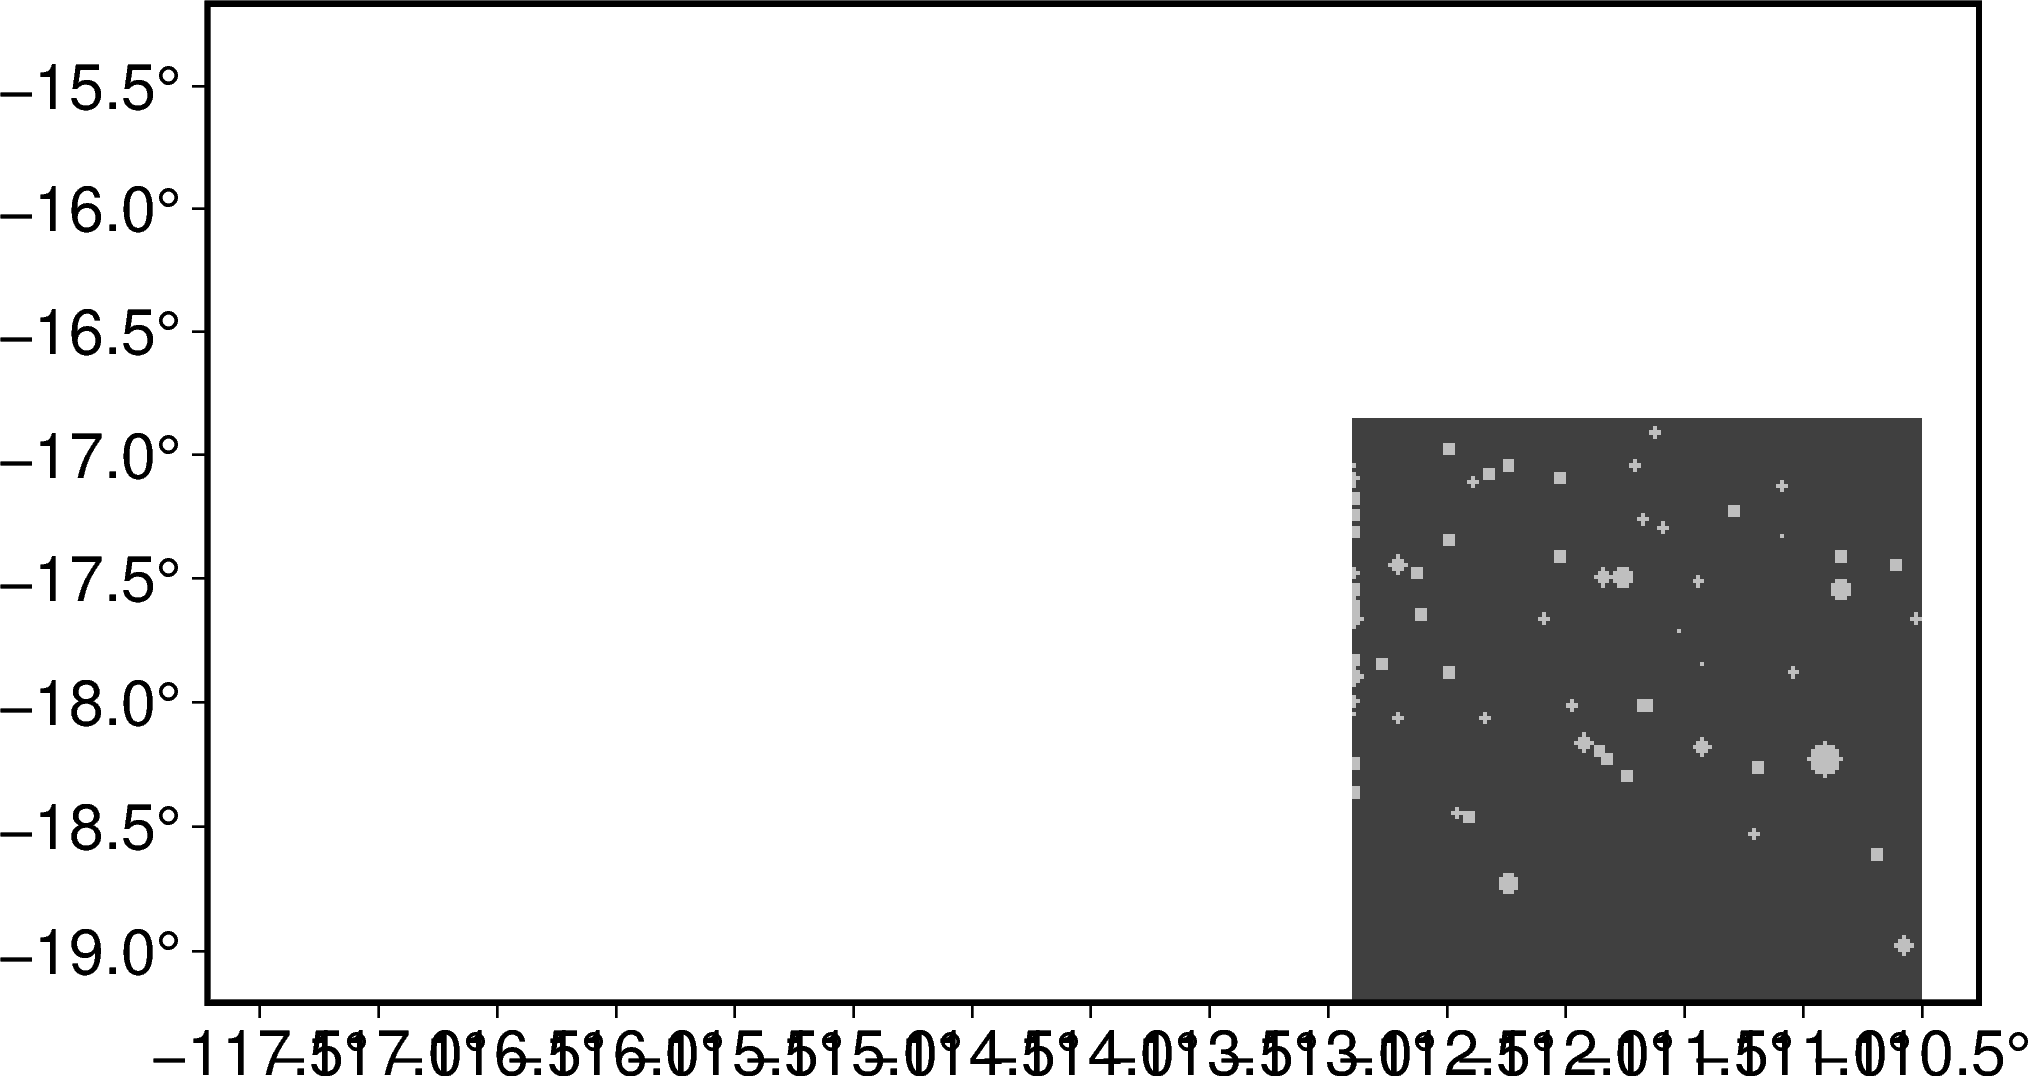

In [15]:
fig = pygmt.Figure()
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", FONT_LABEL="15p,Helvetica,black", FONT_ANNOT="15p")
pygmt.config(FONT_ANNOT_PRIMARY="15p,Helvetica,black")

############################ SWIR ##################################
pygmt.makecpt(cmap="gray", series=[0, 1, 0.5], background='o')
fig.grdimage(
    grid = xr.DataArray(labeled_training_data.Labels, coords=(labeled_training_data.lat, labeled_training_data.lon)),
    # shading = shade_SWIR,
    projection="M15c",
    region = [points[2], points[3], points[0], points[1]],
    frame=["WSrt", "xa0.5", "ya0.5"],
    cmap = True,
    )
# fig.colorbar(position="JML+o-16c/0c+w4c/0.3c+m", frame=["xa1f2", "y+lSeamount"])
# old_vgg_file = xr.open_dataset("/Volumes/envisat2/SWOT/src/sandwell/grid_swot/curv_32.1.nc")
fig.show()

In [16]:
fig = pygmt.Figure()
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", FONT_LABEL="15p,Helvetica,black", FONT_ANNOT="15p")
pygmt.config(FONT_ANNOT_PRIMARY="15p,Helvetica,black")

############################ SWIR ##################################
pygmt.makecpt(cmap="data/colors.cpt", series=[-1, 10, 0.5], background='o')
fig.grdimage(
    grid = xr.open_dataset('data/'+f'{dest}'+'/non_inverted_trans.nc')['z'],
    # shading = shade_SWIR,
    projection="M15c",
    region = [points[2], points[3], points[0], points[1]],
    frame=["WSrt", "xa0.5", "ya0.5"],
    cmap = True,
    )
fig.colorbar(position="JML+o-16c/0c+w4c/0.3c+m", frame=["xa10f2", "y+lEötvös"])
fig.show()

grdinfo (gmtapi_import_grid): No 2-D variable in file [/Users/martinhawks/Code/Git_repos/seamount_picking/code/data/test_files/non_inverted_trans.nc]
[Session pygmt-session (129)]: Error returned from GMT API: GMT_GRID_READ_ERROR (18)
[Session pygmt-session (129)]: Error returned from GMT API: GMT_GRID_READ_ERROR (18)


GMTInvalidInput: Invalid number of grid dimensions '1'. Must be 2.

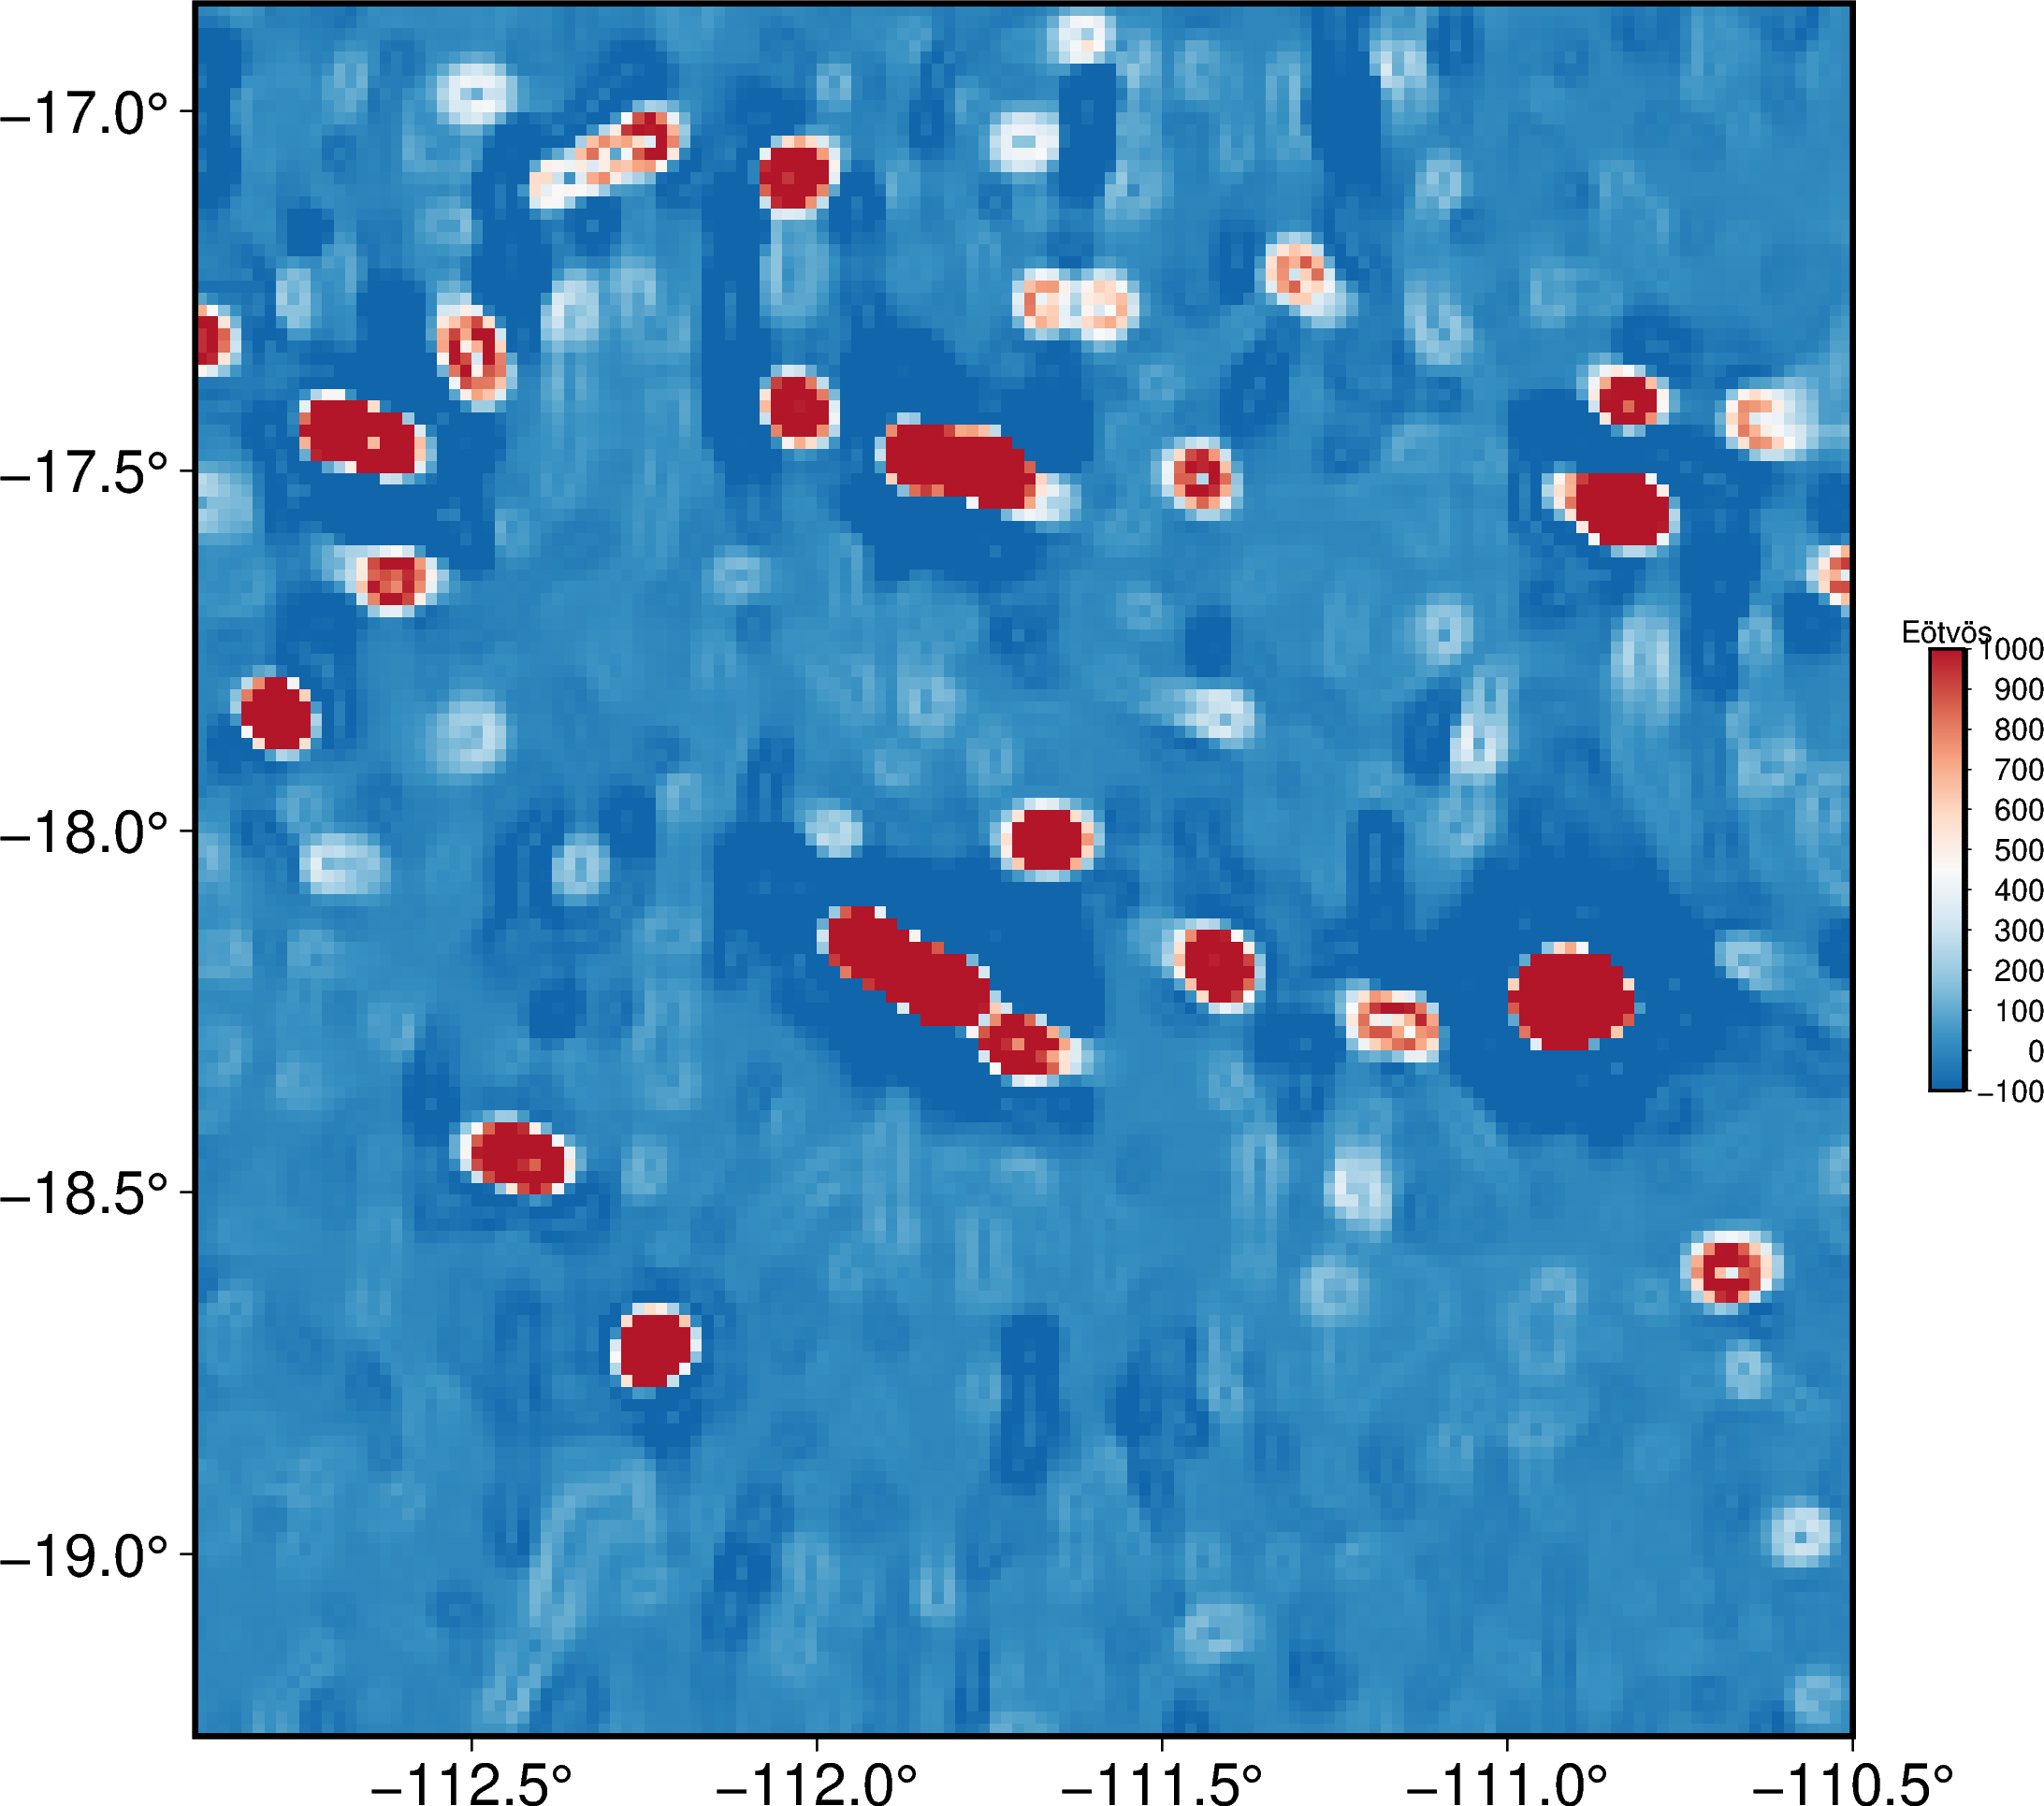

In [77]:
fig = pygmt.Figure()
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", FONT_LABEL="15p,Helvetica,black", FONT_ANNOT="15p")
pygmt.config(FONT_ANNOT_PRIMARY="15p,Helvetica,black")

############################ SWIR ##################################
pygmt.makecpt(cmap="data/colors.cpt", series=[-100, 1000, 0.5], background='o')
fig.grdimage(
    grid = xr.open_dataset('data/'+f'{dest}'+'/sobel_trans.nc')['z'],
    # shading = shade_SWIR,
    projection="M15c",
    region = [points[2], points[3], points[0], points[1]],
    frame=["WSrt", "xa0.5", "ya0.5"],
    cmap = True,
    )
fig.colorbar(position="JML+o-16c/0c+w4c/0.3c+m", frame=["xa100f2", "y+lEötvös"])
fig.show()

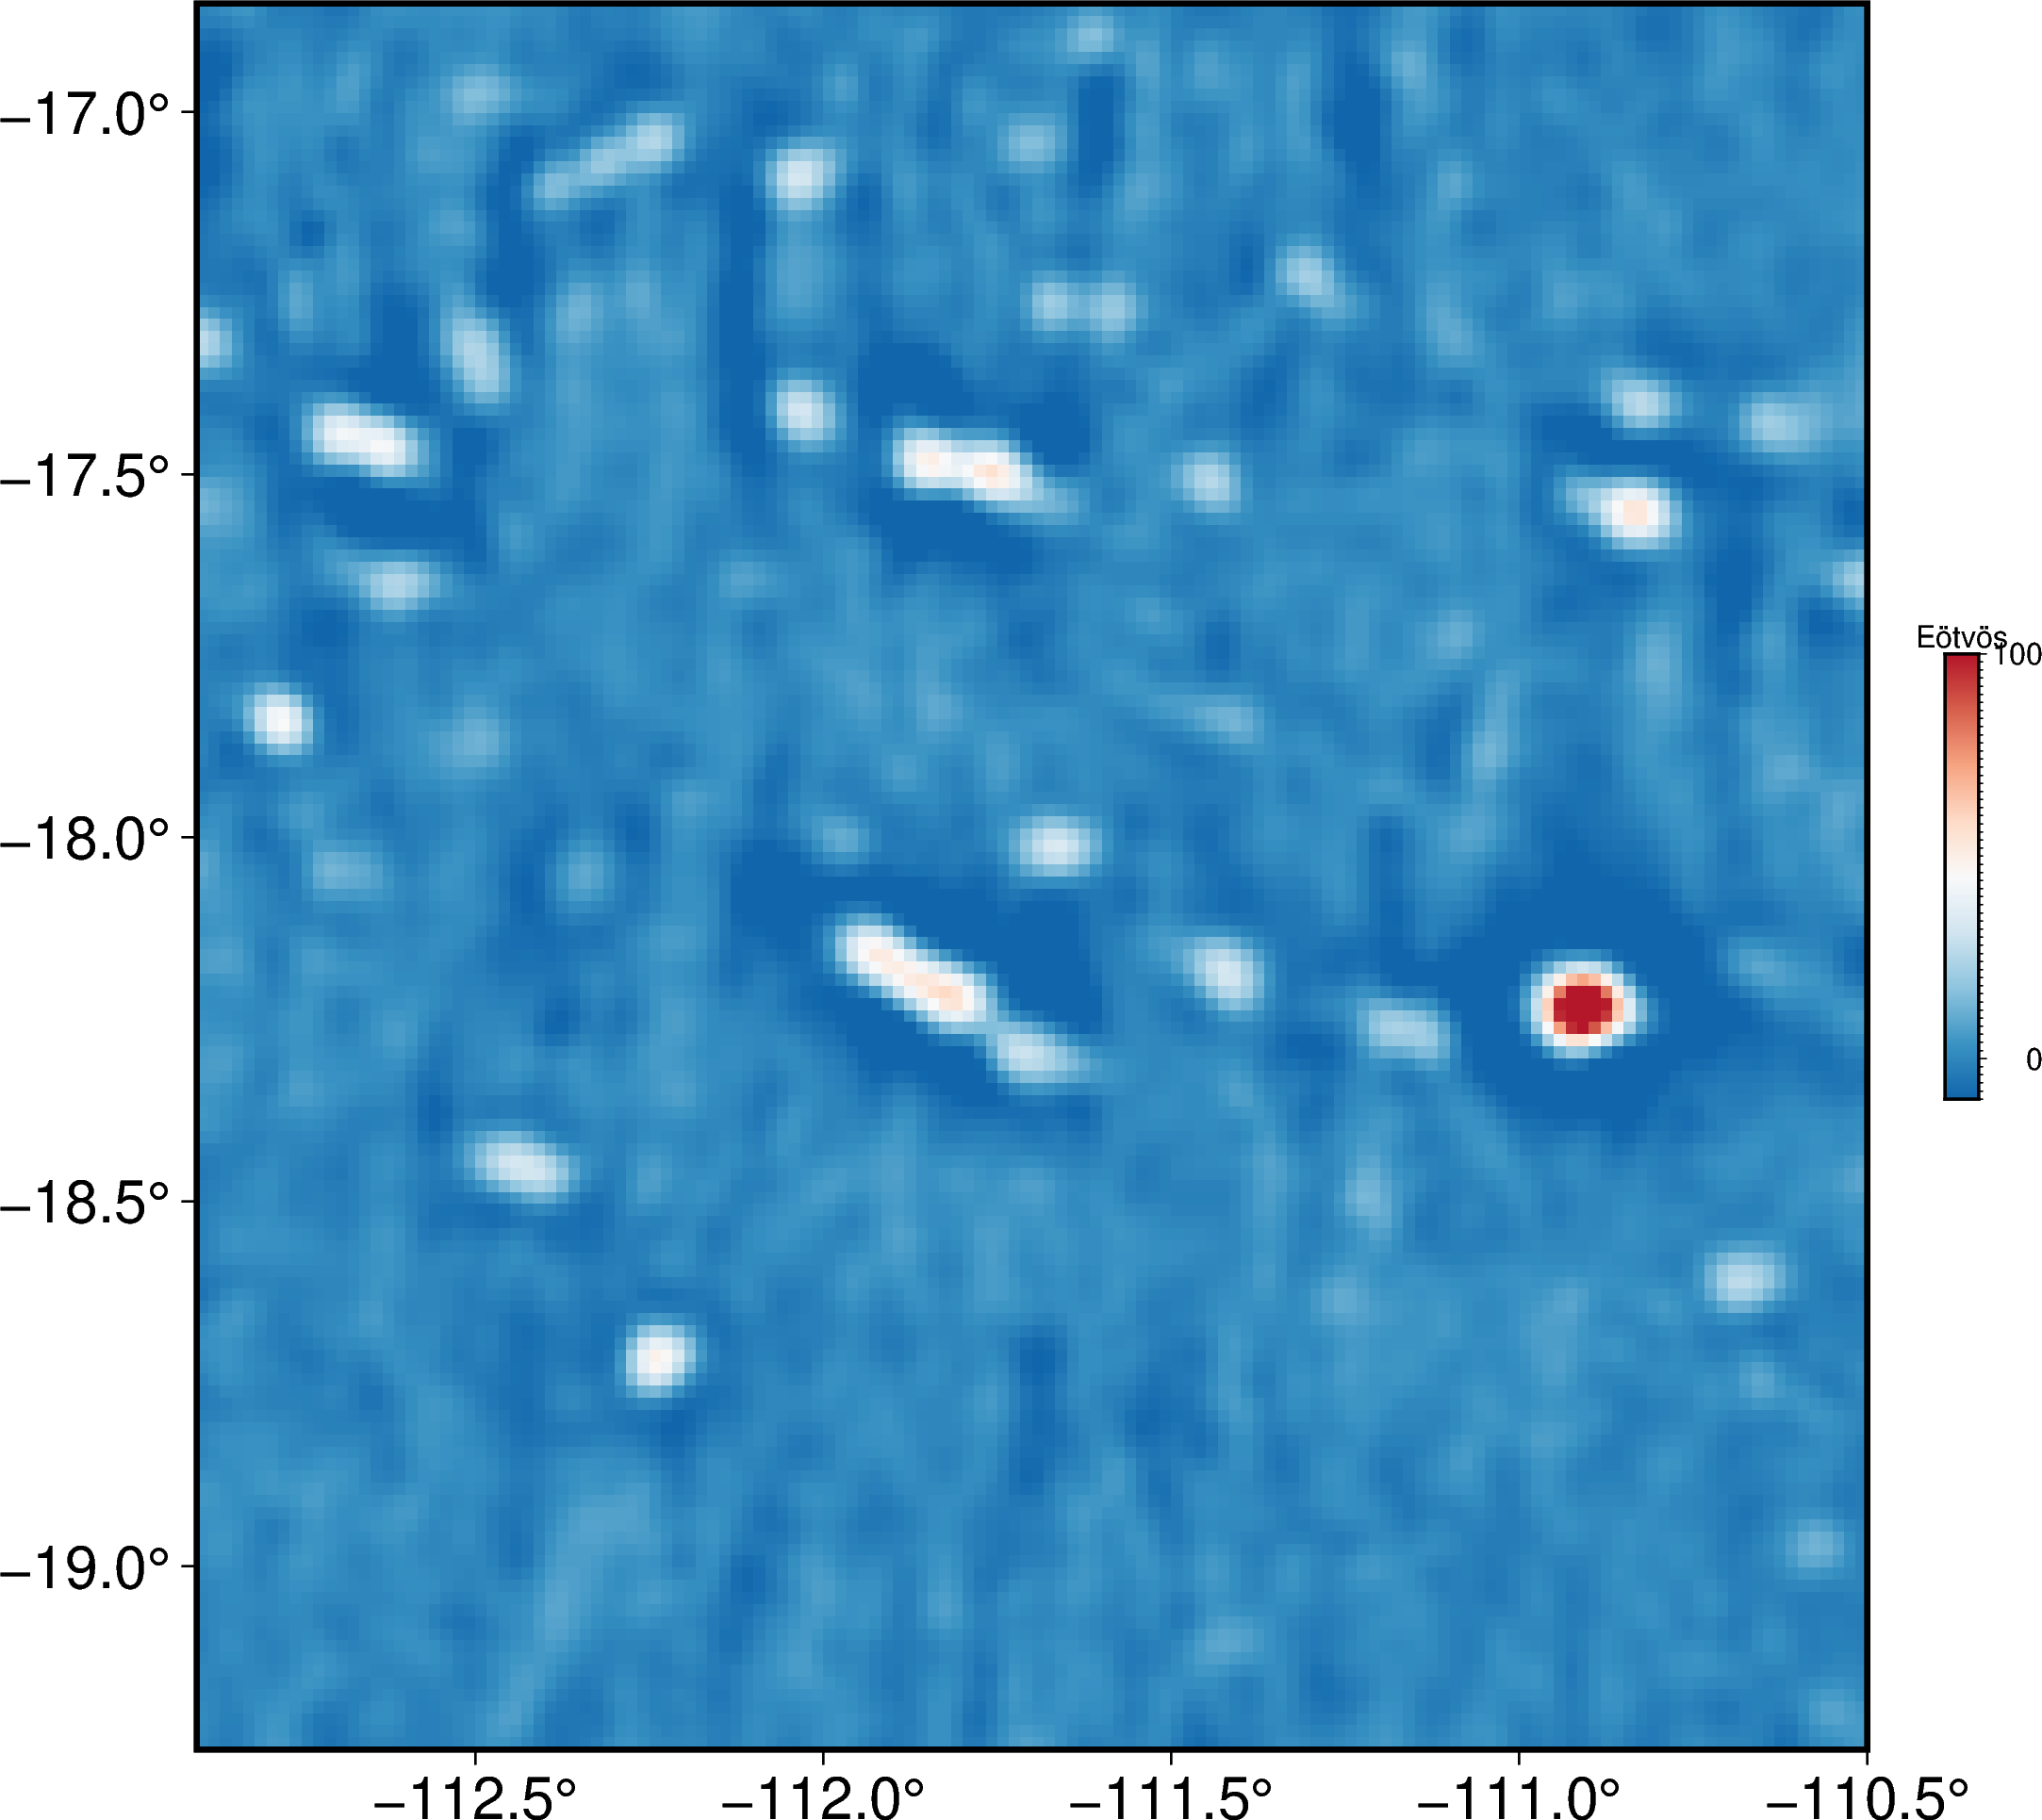

In [78]:
fig = pygmt.Figure()
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", FONT_LABEL="15p,Helvetica,black", FONT_ANNOT="15p")
pygmt.config(FONT_ANNOT_PRIMARY="15p,Helvetica,black")

############################ SWIR ##################################
pygmt.makecpt(cmap="data/colors.cpt", series=[-10, 100, 0.5], background='o')
fig.grdimage(
    grid = xr.open_dataset('data/'+f'{dest}'+'/gaus_trans.nc')['z'],
    # shading = shade_SWIR,
    projection="M15c",
    region = [points[2], points[3], points[0], points[1]],
    frame=["WSrt", "xa0.5", "ya0.5"],
    cmap = True,
    )
fig.colorbar(position="JML+o-16c/0c+w4c/0.3c+m", frame=["xa100f2", "y+lEötvös"])
fig.show()